In [139]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression
import numpy as np

In [140]:
# Difference between regression & classification
weights = np.array([[60], [70], [80], [90], [100]])
dosages = np.array([100, 115, 130, 145, 160])

model = LinearRegression()
model.fit(weights, dosages) # Predict dosage for a new patient weighing 75 kg

new_weight = np.array([[75]])
predicted_dosage = model.predict(new_weight)


print(f"Predicted dosage for 75 kg: {predicted_dosage[0]:.2f} mg")

# Output: ```Predicted dosage for 75 kg: 122.50 mg ```

# Logistic Regression: Predicting presence of heart disease
from sklearn.linear_model import LogisticRegression
cholesterol = np.array([[150], [200], [250], [300], [350]])
heart_disease = np.array([0, 0, 1, 1, 1])
log_model = LogisticRegression()
log_model.fit(cholesterol, heart_disease)

# Predict heart disease for a new patient with cholesterol level 275
new_cholesterol = np.array([[275]])
predicted_prob = log_model.predict_proba(new_cholesterol)[0][1]

print(f"Probability of heart disease for 275 cholesterol: {predicted_prob:.2f}")

# Output: ```Probability of heart disease for 275 cholesterol: 0.73 ```

Predicted dosage for 75 kg: 122.50 mg
Probability of heart disease for 275 cholesterol: 1.00


### Code Block 2: likelihood of a good and a bad regression model ###

In [141]:
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
# Data points
weights = np.array([[60], [70], [80], [90], [100]])
dosages = np.array([100, 115, 130, 145, 160])

# Create and train the good model
model_good = LinearRegression()
model_good.fit(weights, dosages)
print('good model coef and intercept: ' + str(model_good.coef_[0]) + ' ' + str(model_good.intercept_))
# Create a bad model with random coefficients
model_bad = LinearRegression()
print('setting the bad model with coeffciients slightly off as w=1.55 and b=9.5')
model_bad.coef_ = np.array([1.53])
model_bad.intercept_ = np.array([9.5])
# Predict dosages
predictions_good = model_good.predict(weights)
predictions_bad = model_bad.predict(weights)

def calculate_probabilities(predictions, actual, std_dev):
    return norm.pdf(actual - predictions, loc=0, scale=std_dev)

probs_good = calculate_probabilities(predictions_good, dosages, 1)
probs_bad = calculate_probabilities(predictions_bad, dosages, 1)


print('prob of the bad model: ')
print(probs_bad)
print('prob of the good model: ')
print(probs_good)

good model coef and intercept: 1.5000000000000004 9.999999999999972
setting the bad model with coeffciients slightly off as w=1.55 and b=9.5
prob of the bad model: 
[0.17136859 0.11092083 0.06561581 0.03547459 0.0175283 ]
prob of the good model: 
[0.39894228 0.39894228 0.39894228 0.39894228 0.39894228]


### Code Block 3: log likelihood of the good and bad models

In [142]:
log_probs_good = np.log(probs_good)
log_probs_bad = np.log(probs_bad)
print("\nLog probabilities for good model:")
print(log_probs_good)
print("\nLog probabilities for bad model:")
print(log_probs_bad)
# Calculate sum of log probabilities (log-likelihood)
log_likelihood_good = np.sum(log_probs_good)
log_likelihood_bad = np.sum(log_probs_bad)
print(f"\nLog-likelihood for good model: {log_likelihood_good:.2f}")
print(f"Log-likelihood for bad model: {log_likelihood_bad:.2f}")


Log probabilities for good model:
[-0.91893853 -0.91893853 -0.91893853 -0.91893853 -0.91893853]

Log probabilities for bad model:
[-1.76393853 -2.19893853 -2.72393853 -3.33893853 -4.04393853]

Log-likelihood for good model: -4.59
Log-likelihood for bad model: -14.07


### Code Block 4: Gradient of the Parameters, b and w

In [143]:
import numpy as np
# Sample data
X = weights
y = dosages

# Two parameter sets
w1, b1 = 2, 5 # (our initial guess)
w2, b2 = 1.5, 10  # (the secret answer that we are trying to find)

# Function to calculate predictions
def predict(X, w, b):
    return (w * X + b)[:,0]
# Function to calculate Mean Squared Error (MSE) loss
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
# Function to calculate gradient of loss with respect to b

def gradient_b(y_true, y_pred):
    print(y_true - y_pred)
    return -2 * np.mean(y_true - y_pred)

def gradient_w(y_true, y_pred, X):
    #print(y_true - y_pred)
    #print(np.multiply(X, 0 * (y_true - y_pred)))
    #return -2 * np.mean(np.multiply(X.T, (y_true - y_pred)))
    return -2 * np.mean(X * (y_true - y_pred))


# Calculate predictions, loss, and gradient for both parameter sets
y_pred1 = predict(X, w1, b1)
loss1 = mse_loss(y, y_pred1)
grad_b1 = gradient_b(y, y_pred1)
y_pred2 = predict(X, w2, b2)
loss2 = mse_loss(y, y_pred2)
grad_b2 = gradient_b(y, y_pred2)


print('Parameter set 1:  ' + 'w=' + str(w1) + ' b=' + str(b1))
print('Loss: ' + str(loss1))
print('Gradient dL / dw: ' + str(gradient_w(y, y_pred1, X)))
print('Gradient dL / db: ' + str(grad_b1))

print('Parameter set 2:  ' + 'w=' + str(w2) + ' b=' + str(b2))
print('Loss: ' + str(loss2))
print('Gradient dL / dw: ' + str(gradient_w(y, y_pred2, X)))
print('Gradient dL / db: ' + str(grad_b2))

[-25 -30 -35 -40 -45]
[0. 0. 0. 0. 0.]
Parameter set 1:  w=2 b=5
Loss: 1275.0
Gradient dL / dw: 5600.0
Gradient dL / db: 70.0
Parameter set 2:  w=1.5 b=10
Loss: 0.0
Gradient dL / dw: -0.0
Gradient dL / db: -0.0


In [144]:
### Code Block 5: Log probabilities and sigmoid function

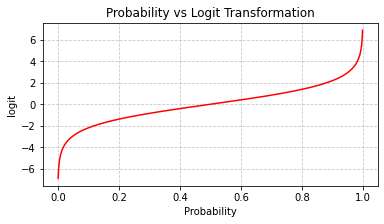

In [145]:
import numpy as np
import matplotlib.pyplot as plt

# Create probability values from 0 to 1 (excluding 0 and 1 to avoid infinity)
p = np.linspace(0.001, 0.999, 1000)

# Calculate logit values
logit = np.log(p / (1 - p))

# Create the plot
plt.figure(figsize=(6, 3))

# Plot logit
plt.plot(p, logit, label='Logit', color='red')

# Add labels and title
plt.xlabel('Probability')
plt.ylabel('logit')
plt.title('Probability vs Logit Transformation')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


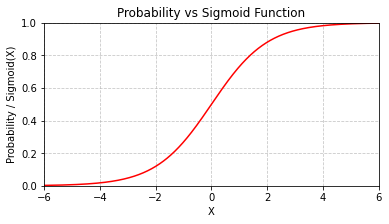

In [146]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Create x values from -6 to 6
x = np.linspace(-6, 6, 1000)

# Calculate sigmoid values
y_sigmoid = sigmoid(x)

# Create the plot
plt.figure(figsize=(6, 3))

# Plot sigmoid
plt.plot(x, y_sigmoid, label='Sigmoid', color='red')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Probability / Sigmoid(X)')
plt.title('Probability vs Sigmoid Function')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Set x and y axis limits
plt.xlim(-6, 6)
plt.ylim(0, 1)

# Show the plot
plt.show()
